In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from keras.models import Sequential, load_model
from keras.layers import Dense 
from keras import backend as K
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

### Data Preprocessing

In [7]:
# Normalize and reeshape images 
X_train_final = X_train.reshape(-1, 32*32*3) / 255
X_test_final = X_test.reshape(-1, 32*32*3) / 255

In [8]:
X_train_final.shape

(50000, 3072)

### Modelling

In [10]:
model = Sequential()
model.add(Dense(1024, input_dim=3072, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 3,286,858
Trainable params: 3,286,858
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [12]:
result = model.fit(X_train_final, y_train, verbose=1, epochs=10, validation_data=(X_test_final, y_test))

Epoch 1/10
1563/1563 [==============================] - 154s 97ms/step - loss: 1.9089 - accuracy: 0.3110 - val_loss: 1.7183 - val_accuracy: 0.3895
Epoch 2/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.7006 - accuracy: 0.3896 - val_loss: 1.6660 - val_accuracy: 0.4058
Epoch 3/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.6167 - accuracy: 0.4195 - val_loss: 1.5894 - val_accuracy: 0.4298
Epoch 4/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5579 - accuracy: 0.4420 - val_loss: 1.5116 - val_accuracy: 0.4573
Epoch 5/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.5160 - accuracy: 0.4585 - val_loss: 1.5319 - val_accuracy: 0.4550
Epoch 6/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4823 - accuracy: 0.4687 - val_loss: 1.4824 - val_accuracy: 0.4721
Epoch 7/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4537 - accuracy: 0.4813 - val_loss

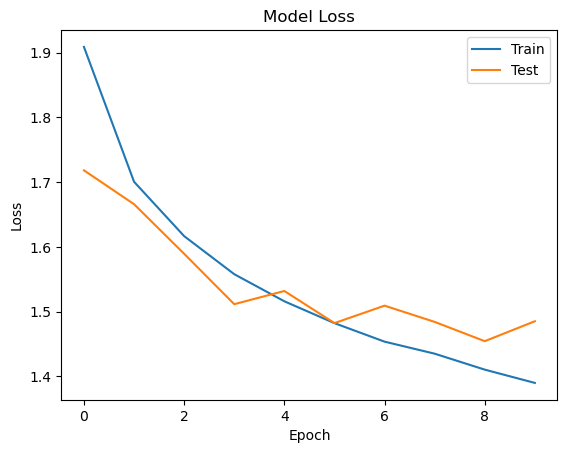

In [13]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

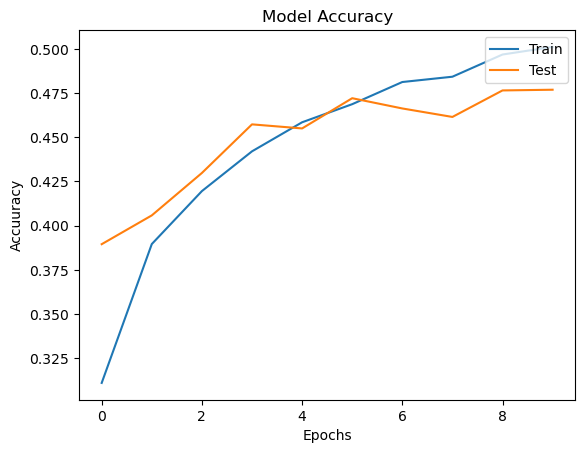

In [16]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [15]:
model.save("models/mnist_classification.h5")